In [1]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
all_fighter_data = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')


#import fihgt styles dims
fighters_styles_dims = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/fighters_styles_dims.csv')
#fighters_styles_dims = fighters_styles_dims.dropna()

Data loaded successfully:


In [2]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

fighters_styles_dims_copy = fighters_styles_dims.copy()
fighters_styles_dims_copy.loc[:, style_dims_names] = scaler.fit_transform(fighters_styles_dims_copy[style_dims_names])
fighters_styles_dims = fighters_styles_dims_copy



# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

In [4]:
weight_class = list(fighters_styles_dims['weight_class'].drop_duplicates())
weight_class.remove('OpenWeight')
weight_class.remove('WomenBantamweight')
weight_class.remove('WomenFeatherweight')

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


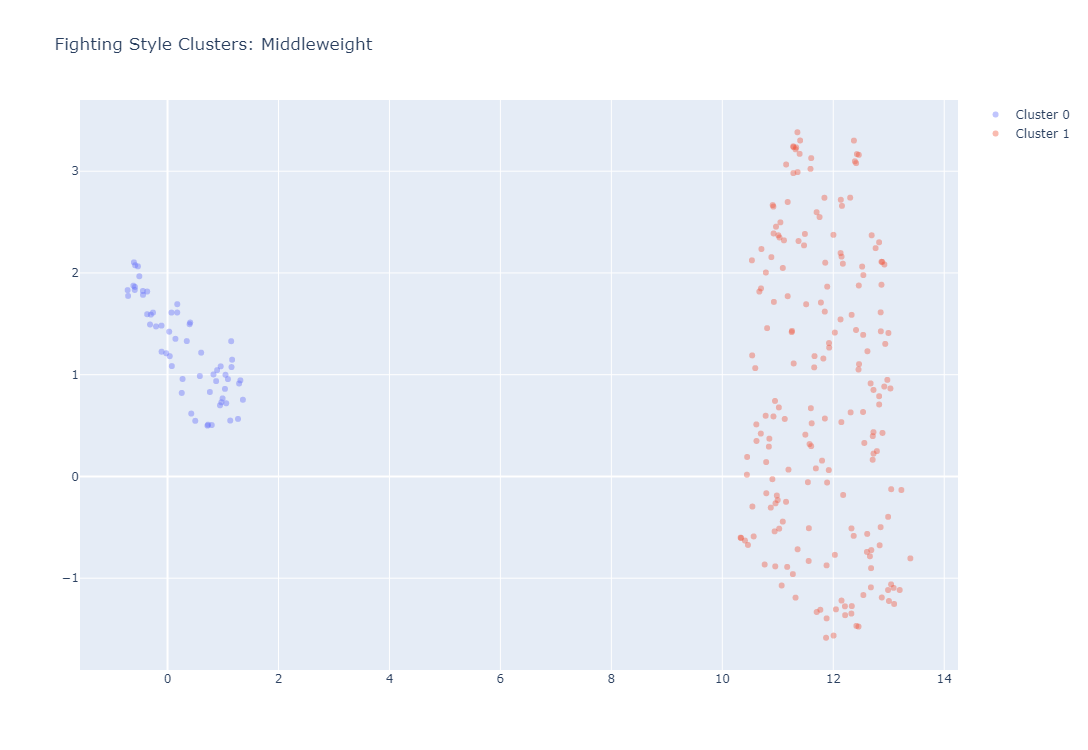

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



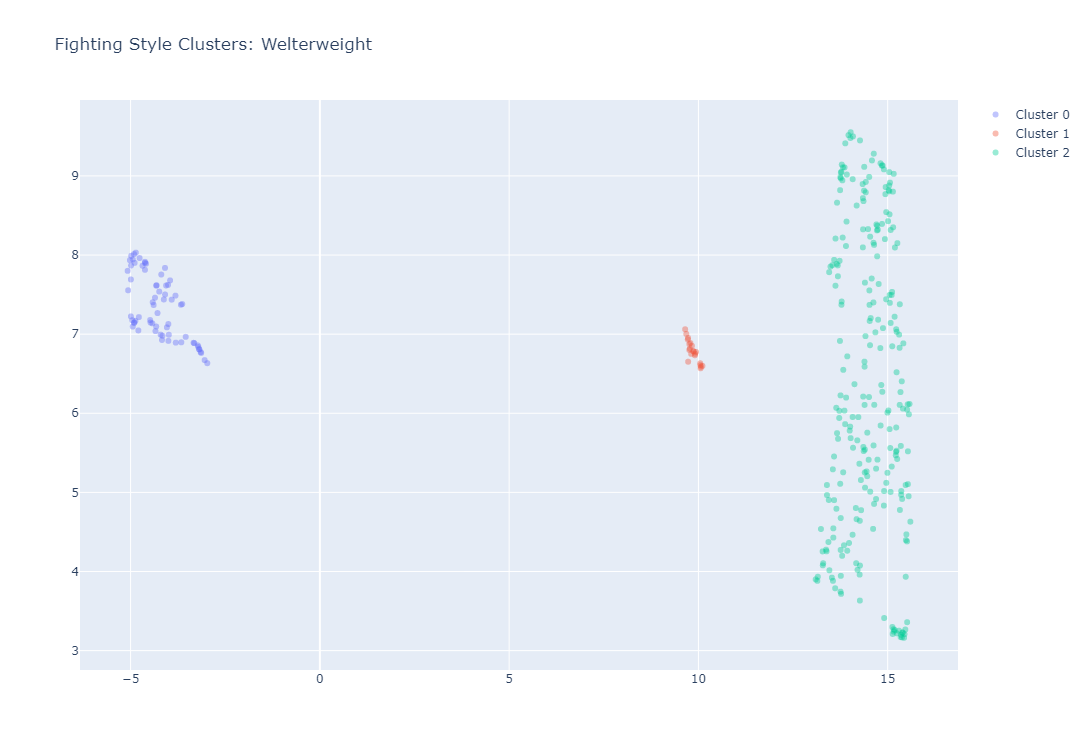

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



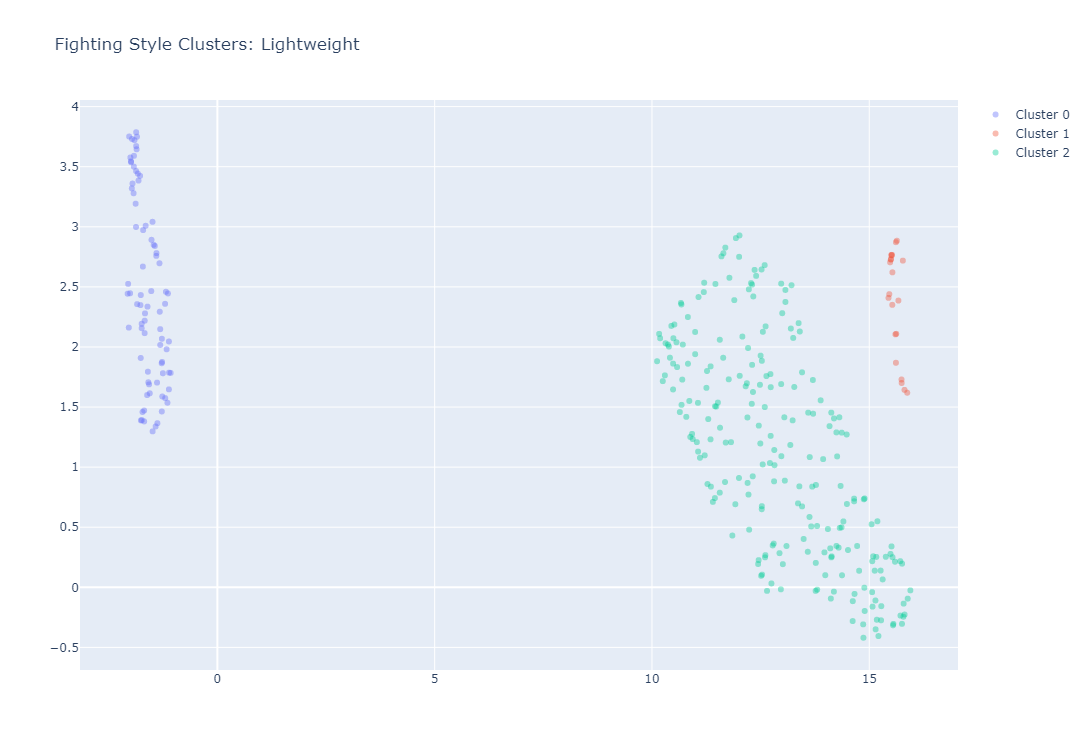

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



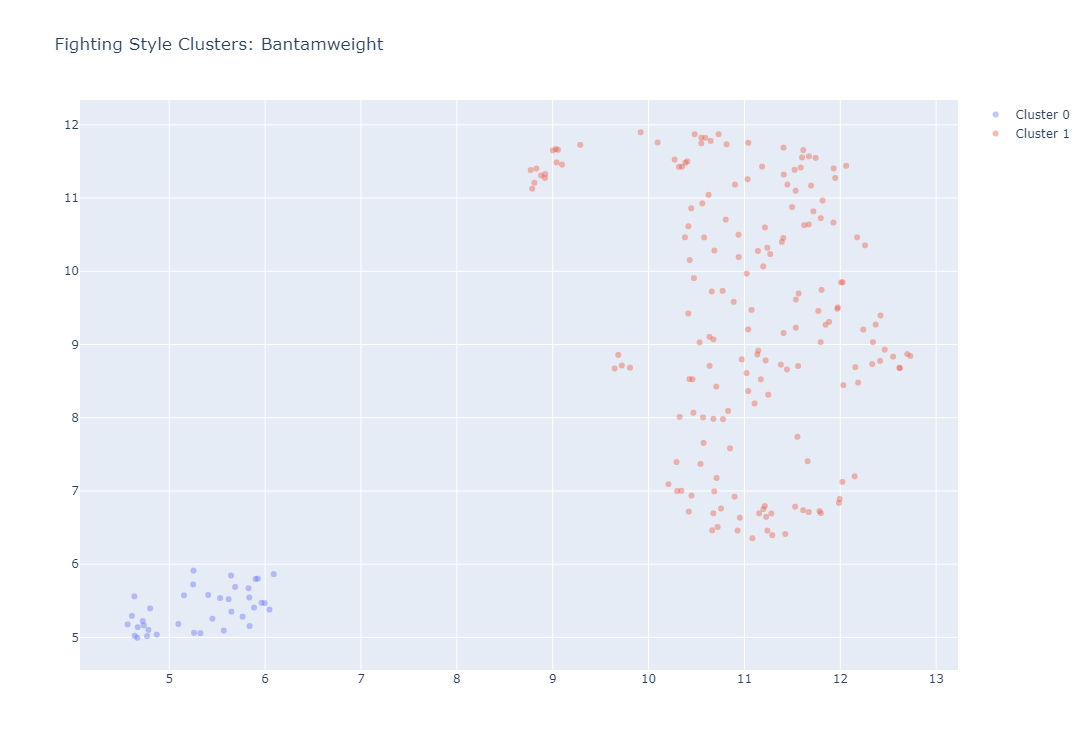

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



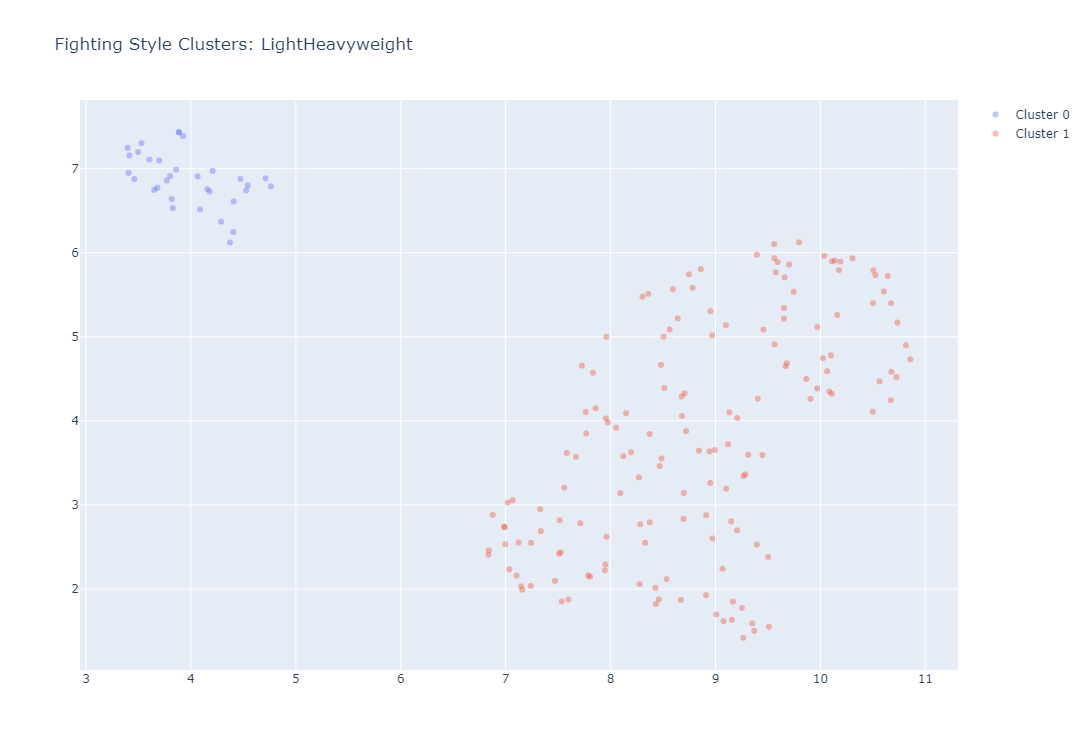

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



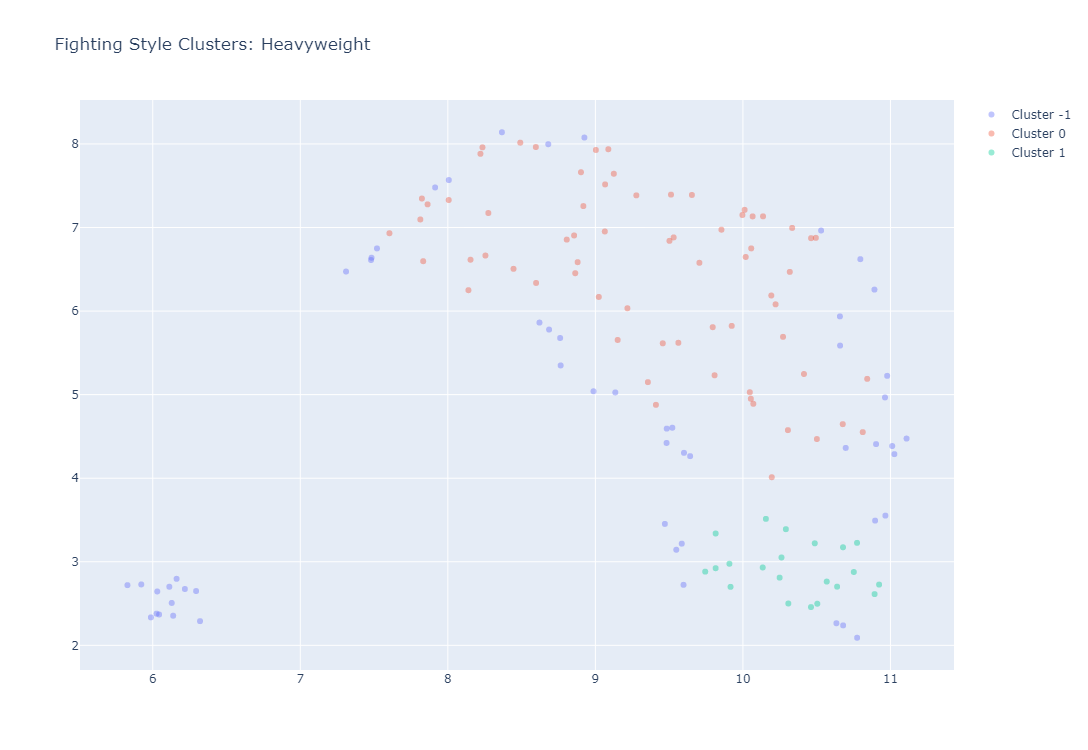

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



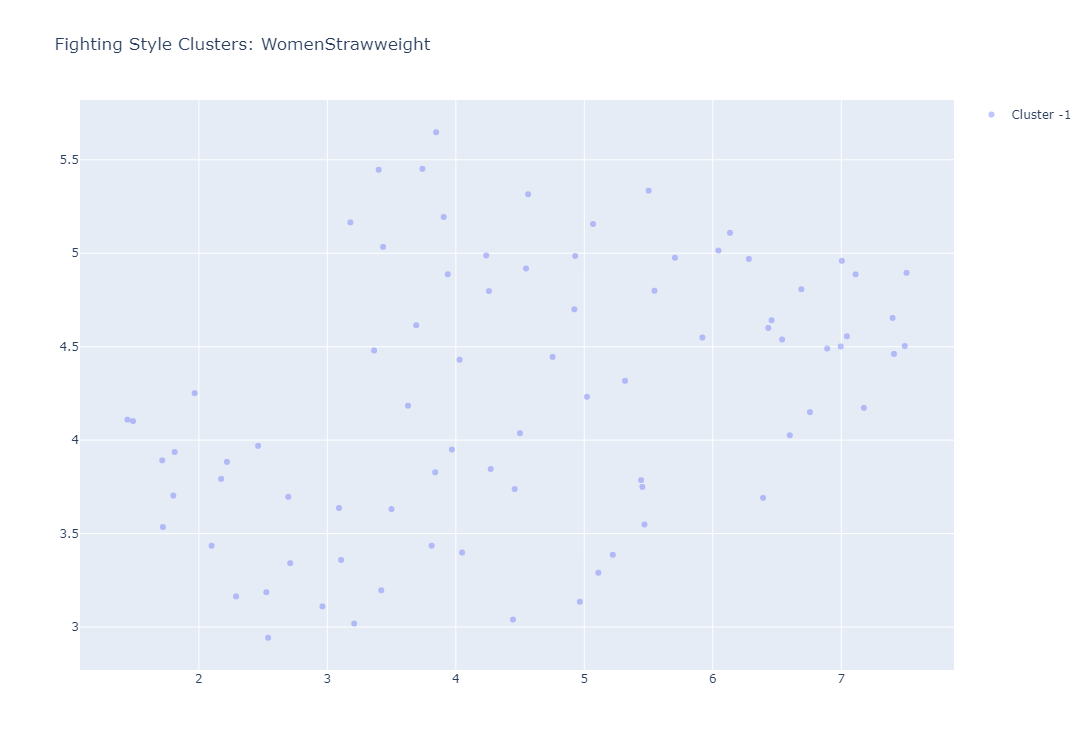

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



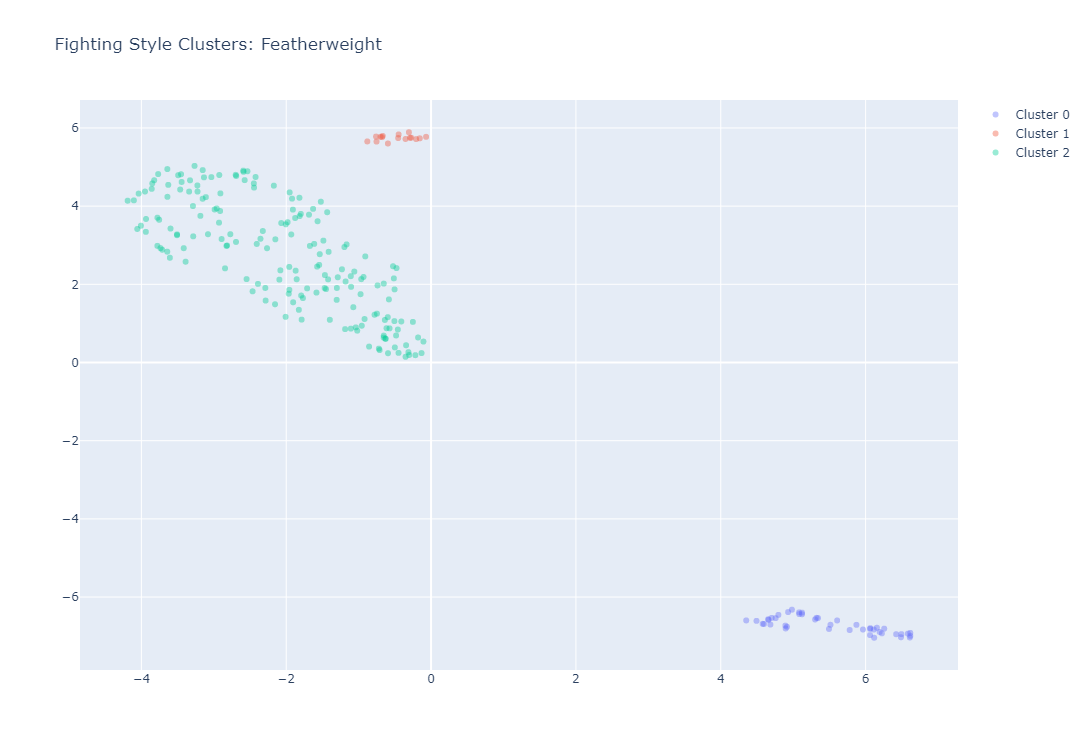

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



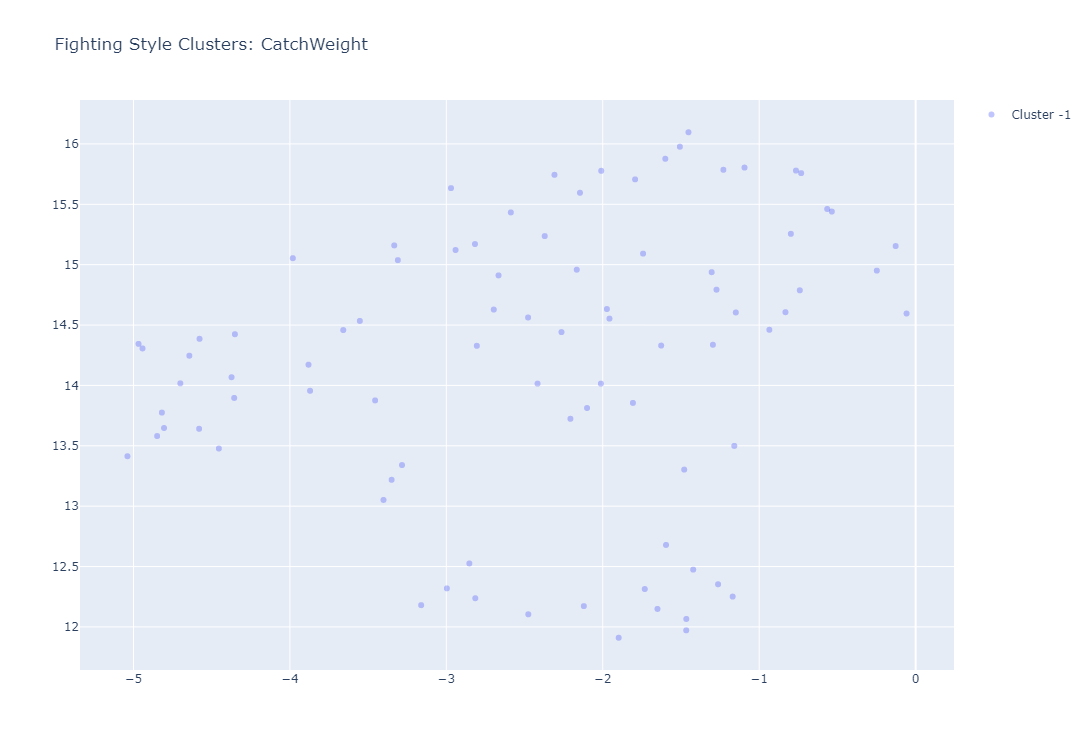

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



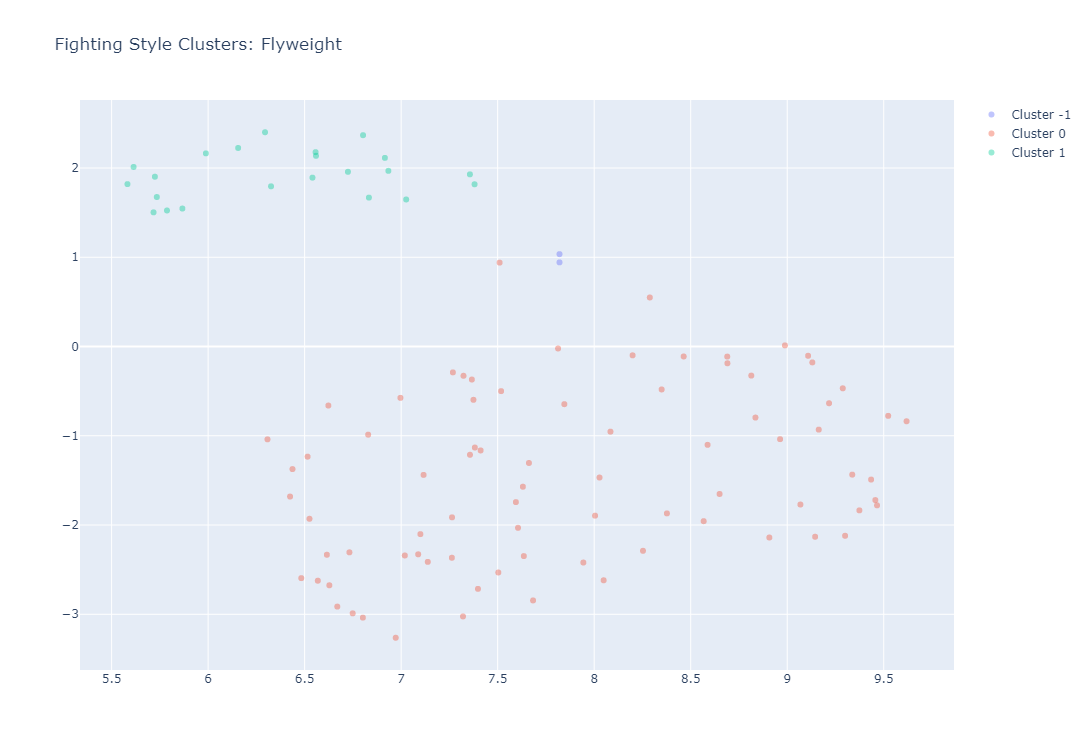

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



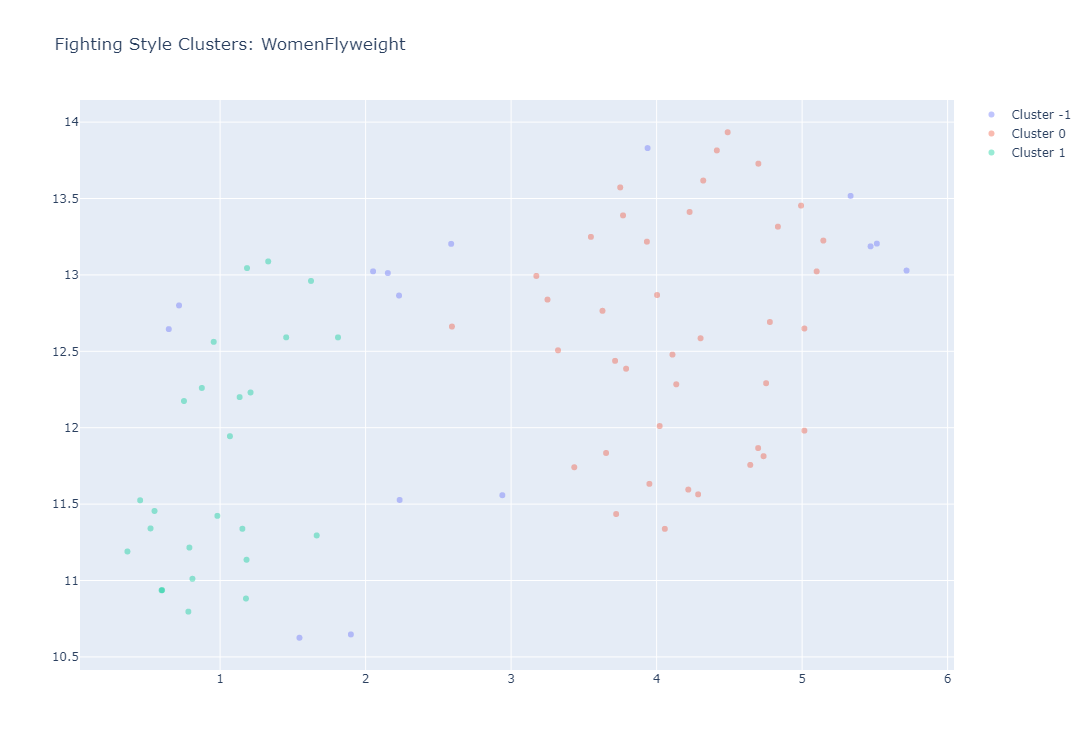

In [5]:
from scripts.cluster_gower_weight import ClusterAnalysis

for weight in weight_class:
    ca = ClusterAnalysis(fighters_styles_dims.loc[fighters_styles_dims['weight_class'] == weight], n_neighbors=15, min_cluster_size=15, min_dist=0.02, cluster_dims=style_dims_names, export_data=True, weight_factor=0.01)
    ca.run()


In [6]:
import os
import pandas as pd
import requests
from io import StringIO

# Set your GitHub username, repository name, and path to the directory
username = 'john-adeojo'
repository = 'ufc_styles'
directory_path = 'data/02_intermediate'

# Generate the GitHub API URL for the repository contents
api_url = f'https://api.github.com/repos/{username}/{repository}/contents/{directory_path}'

# Fetch the list of files in the GitHub repository
response = requests.get(api_url)
files = response.json()

all_fighter_clusters = pd.DataFrame()

for file in files:
    file_name = file['name']
    if file_name.startswith('fighter_cluster') and file_name.endswith('.csv'):
        file_url = file['download_url']
        response = requests.get(file_url)
        csv_data = StringIO(response.text)
        
        df = pd.read_csv(csv_data)
        all_fighter_clusters = pd.concat([all_fighter_clusters, df], ignore_index=True)

# Display the DataFrame
all_fighter_clusters


Fighter_dims      weight_class    avg_KD  avg_opp_KD  avg_SUB_ATT  \
0      Aaron Phillips      Bantamweight  0.000000    0.000000     0.032045   
1        Adrian Yanez      Bantamweight  0.086928    0.000000     0.000000   
2      Aiemann Zahabi      Bantamweight  0.020340    0.007194     0.000000   
3        Alatengheili      Bantamweight  0.000000    0.000000     0.000000   
4      Albert Morales      Bantamweight  0.000000    0.009454     0.000000   
...               ...               ...       ...         ...          ...   
2042  Virna Jandiroba  WomenStrawweight  0.002771    0.000000     0.067809   
2043  Viviane Pereira  WomenStrawweight  0.000000    0.000000     0.007121   
2044      Yan Xiaonan  WomenStrawweight  0.000000    0.000000     0.000000   
2045  Yazmin Jauregui  WomenStrawweight  0.000000    0.000000     0.000000   
2046      Zhang Weili  WomenStrawweight  0.008195    0.004375     0.016458   

      avg_opp_SUB_ATT   avg_REV  avg_opp_REV  avg_SIG_STR_att  \
0            0.025000  0.118472     0.107778         0.062431   
1            0.000000  0.000000     0.000000         0.314171   
2            0.000000  0.040913     0.000000         0.152495   
3            0.000000  0.000000     0.000000         0.245417   
4            0.008765  0.000000     0.000000         0.263411   
...               ...       ...          ...              ...   
2042         0.003294  0.137793     0.062677         0.113797   
2043         0.000000  0.000000     0.000000         0.161339   
2044         0.008234  0.000000     0.000000         0.295943   
2045         0.000000  0.000000     0.000000         0.312870   
2046         0.010586  0.029139     0.013603         0.272133   

      avg_SIG_STR_landed  ...  avg_opp_CTRL_time(seconds)  Stance_Open Stance  \
0               0.037725  ...                    0.739330                 0.0   
1               0.147416  ...                    0.113520                 0.0   
2               0.070488  ...                    0.093618                 0.0   
3               0.075450  ...                    0.000000                 0.0   
4               0.102147  ...                    0.192858                 0.0   
...                  ...  ...                         ...                 ...   
2042            0.056462  ...                    0.241624                 0.0   
2043            0.060278  ...                    0.214714                 0.0   
2044            0.144520  ...                    0.271124                 0.0   
2045            0.141058  ...                    0.038643                 0.0   
2046            0.144521  ...                    0.080928                 0.0   

      Stance_Orthodox  Stance_Sideways  Stance_Southpaw  Stance_Switch  \
0                 0.0              0.0              1.0            0.0   
1                 1.0              0.0              0.0            0.0   
2                 1.0              0.0              0.0            0.0   
3                 1.0              0.0              0.0            0.0   
4                 1.0              0.0              0.0            0.0   
...               ...              ...              ...            ...   
2042              1.0              0.0              0.0            0.0   
2043              1.0              0.0              0.0            0.0   
2044              1.0              0.0              0.0            0.0   
2045              1.0              0.0              0.0            0.0   
2046              0.0              0.0              0.0            1.0   

              x          y  cluster     specific_cluster  
0      9.246127   7.234165        0       0_Bantamweight  
1     12.826781  10.921268        1       1_Bantamweight  
2     11.108876  10.119686        1       1_Bantamweight  
3     12.785881   9.779035        1       1_Bantamweight  
4     12.412149  10.349052        1       1_Bantamweight  
...         ...        ...      ...                  ...  
2042   7.606944 

In [7]:
all_fighter_clusters.to_csv(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\02_intermediate\all_fighter_clusters.csv", index=False)